In [5]:
import numpy as np
import matplotlib.pyplot as plt

import pickle
import gzip
from scipy.optimize import minimize



np.random.seed(12345)


def ToroidalDist1Neuron(a,b):
    dx = abs(a[0]-b[0])
    dy = abs(a[1]-b[1])
    dx = np.minimum(dx, 2*np.pi - dx)
    dy = np.minimum(dy, 2*np.pi - dy)
    return(np.sqrt(dx**2 + dy**2))
    


def makehddata(N):
  h = 0.1
  beta = 20
  sigma = np.pi/2.

  ### Note: here we are assuming a 1 second bin (if the numbers above are in Hz)
  ### in the data, 1s bins are uncommon (because lots happen in 1s), but that's ok.
  hd_sim = np.random.uniform(0, 2 * np.pi, size=(2,T))
  rf_hd = np.random.uniform(0, 2 * np.pi, size=(2,N))
  S = np.zeros((N, T))

  max_response = float('-inf')
  max_exp_response = float('-inf')
  for i in range(N):
      for t in range(T):
          dist = ToroidalDist1Neuron(rf_hd[:,i], hd_sim[:,t])
          #dist = np.abs(rf_hd[i] - hd_sim[t])
        #   if dist>np.pi:
        #       dist = 2*np.pi-dist
          response = np.log(h) + (np.log(beta/h))*np.exp(-dist**2 / (2*sigma**2))
          S[i, t] = np.random.poisson(lam=np.exp(response))
          max_response = max(max_response, response)
          max_exp_response = max(max_exp_response, np.exp(response))
  return(max_response, max_exp_response,hd_sim, S)

T = 3000
N = 100
max_response, max_exp_response, hd_sim, S = makehddata(N)
#hd_sim2, S2 = makehddata(N)
print(max_response, max_exp_response, np.max(S))

split_index = int(T * 0.8)
hd_sim_train = hd_sim[:, :split_index]
hd_sim_test = hd_sim[:, split_index:]
S_train = S[:, :split_index]
S_test = S[:, split_index:]

data = {'hd_sim_train':hd_sim_train,'hd_sim_test':hd_sim_test, 'S_train':S_train,'S_test':S_test}
#data2 = {'circvalues':hd_sim2, 'S':S2}
with gzip.open('torus.pkl.gz', 'wb') as f:
  pickle.dump(data, f)

#concatenated_S = np.concatenate((S1, S2))
#concatenated_hd_sim = np.vstack((hd_sim, hd_sim2))
#concatenated_S = np.transpose(np.concatenate((np.transpose(S), np.transpose(S2)), axis=0))
#concatenated_hd_sim = np.transpose(np.concatenate((np.transpose(hd_sim), np.transpose(hd_sim2)), axis=0))


print("Dimensions of hd_sim:", hd_sim.shape)
# print("Dimensions of hd_sim2:", hd_sim2.shape)
print("Dimensions of S:", S.shape)

print("Mean of S: ", np.mean(S))



2.995624568195781 19.997846008836078 37.0
Dimensions of hd_sim: (2, 3000)
Dimensions of S: (100, 3000)
Mean of S:  1.9600666666666666


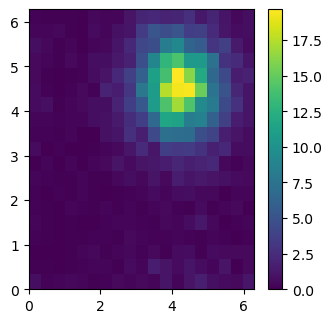

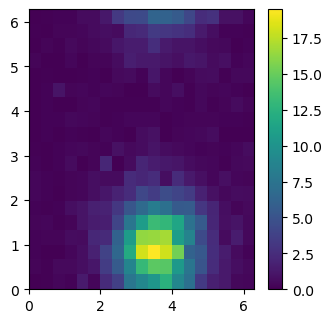

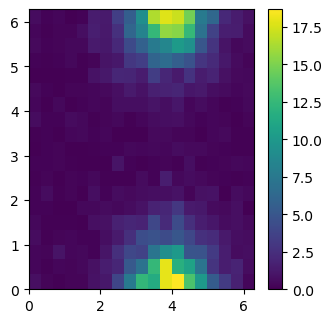

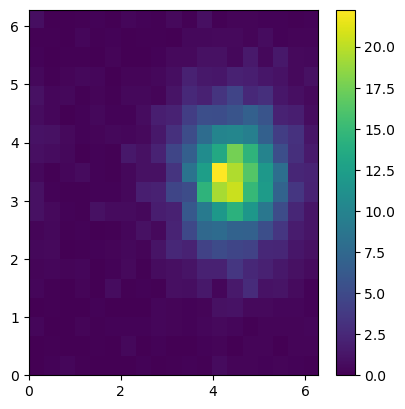

In [6]:
nr_bins = 20
angles = np.linspace(0, 2*np.pi+0.00001, nr_bins)
angleverts = (0.5*(angles[0:(-1)]+angles[1:]))
angleverts2d = np.zeros((nr_bins-1,nr_bins-1))
#plt.hist2d(hd_sim[0], hd_sim[1],bins=(30,30))
#plt.show()
for i in range(4):
    tuningcurve = np.zeros(len(angleverts))
    tuningcurve2 = np.zeros(len(angleverts))
    for j in range(len(angleverts)):
        indsO0 = (hd_sim[0] >= angles[j]) * (hd_sim[0] < angles[j+1])
        tuningcurve[j] = np.mean(S[i, indsO0])
        indsO1 = (hd_sim[1] >= angles[j]) * (hd_sim[1] < angles[j+1])
        tuningcurve2[j] = np.mean(S[i, indsO1])
        
        for k in range(len(angleverts)):
            inds2 = (hd_sim[1] >= angles[k]) * (hd_sim[1] < angles[k+1])
            ind2d = indsO0 * inds2
            angleverts2d[j, k] = np.mean(S[i, ind2d])
    
    plt.figure(figsize=(8, 8))
    plt.subplot(2, 2, i+1)
    plt.imshow(angleverts2d, extent=[0, 2*np.pi, 0, 2*np.pi], aspect='auto')
    plt.colorbar()
    
    

plt.tight_layout()




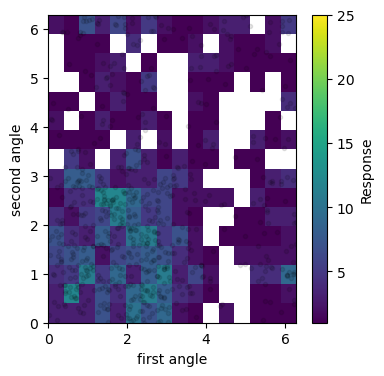

In [5]:
threshold = 0
bin_size = np.pi/8

# Create bins
bins_hd1 = np.arange(0, 2*np.pi + bin_size, bin_size)
bins_hd2 = np.arange(0, 2*np.pi + bin_size, bin_size)

# Plot tuning curves above the threshold using 2D histograms
plt.figure(figsize=(4, 4))
for neuron in range(1):
    above_threshold = S[neuron, :] > threshold
    plt.plot(hd_sim[0, above_threshold], hd_sim[1, above_threshold], 'k.', alpha=0.1)  # Plot simulated head directions
    #plt.scatter(hd_sim[0, above_threshold], hd_sim[1, above_threshold], c=S[neuron, above_threshold],
    #            cmap='viridis', s=30)  # Color by firing rate
    plt.hist2d(hd_sim[0, above_threshold], hd_sim[1, above_threshold],
               bins=[bins_hd1, bins_hd2], cmap='viridis', cmin=1, vmax=25)  # Color by firing rate
    #plt.title(f'Tuning Curve for Neuron {neuron + 1} (Above {threshold} Firing Rate)')
    plt.xlabel('first angle')
    plt.ylabel('second angle')
    plt.colorbar(label='Response')
    plt.show()




In [26]:
def ToroidalDist1Neuron(a,b):
    dx = abs(a[0]-b[0])
    dy = abs(a[1]-b[1])
    dx = np.minimum(dx, 2*np.pi - dx)
    dy = np.minimum(dy, 2*np.pi - dy)
    return(np.sqrt(dx**2 + dy**2))
    

x0 = (0,0)
y0 = (0,0)
y1 = (np.pi*1/4,np.pi*1/4)
x1 = (np.pi,np.pi)
x0 = (0,0)
y2 = (np.pi*1/4,np.pi*7/4)
x0 = (0,0)
y0 = (0,0)
y3 = (np.pi*7/4,np.pi*1/4)
y4 = (np.pi*7/4,np.pi*7/4)

result00 = ToroidalDist1Neuron(x0,y0)
result01 = ToroidalDist1Neuron(x0,y1)
result02 = ToroidalDist1Neuron(x0,y2)
result03 = ToroidalDist1Neuron(x0,y1)
result04 = ToroidalDist1Neuron(x0,y2)

result10 = ToroidalDist1Neuron(x1,y0)
result11 = ToroidalDist1Neuron(x1,y1)
result12 = ToroidalDist1Neuron(x1,y2)
result13 = ToroidalDist1Neuron(x1,y3)
result14 = ToroidalDist1Neuron(x1,y4)

print("distances from x0 = (0,0): ",result00,result01,result02,result03,result04)
print("distances from x0 = np.pi*1/4,np.pi*7/4): ",result10,result11,result12,result13,result14)

def ToroidalDist(angles, D): #CHANGED
        D = np.array(D)
        theta = angles[0]
        phi = angles[1]
        #print("tehta, phi, D: ", theta, phi, D)
        
        dx = np.zeros_like(D[:,0])
        dy = np.zeros_like(D[:,0])
        
        for i in range(len(D)):
            dx[i] = abs(D[i, 0] - theta)
            dy[i] = abs(D[i, 1] - phi)
            dx[i] = np.minimum(dx[i], 2 * np.pi - dx[i])
            dy[i] = np.minimum(dy[i], 2 * np.pi - dy[i])
        #print(dx,dy)
        distances = np.sqrt(dx**2 + dy**2)
        return distances

y= (y0,y1,y2,y3,y4)

print(ToroidalDist(x0,y))

distances from x0 = (0,0):  0.0 1.1107207345395915 1.1107207345395915 1.1107207345395915 1.1107207345395915
distances from x0 = np.pi*1/4,np.pi*7/4):  4.442882938158366 3.3321622036187746 3.3321622036187746 3.3321622036187746 3.3321622036187746
[0.         1.11072073 1.11072073 1.11072073 1.11072073]
